# This is a Jupyter notebook for CE888 Assignment 1 - Imbalanced Datasets
In this notebook, we will load three balanced datasets, unbalance them by resampling the the classes and test a new approach to dealing with imbalanced datasets.

# Step 1: Load the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
%matplotlib inline

# Step 2: Load the datasets


###df3: Diabetes Health Indicators Dataset

Downloaded from Kaggle

This is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

In [3]:
df3 = pd.read_csv("https://raw.githubusercontent.com/superchromat/CE888/master/assignment1/diabetes_binary_5050split_health_indicators_BRFSS2015.csv?raw=true")

df3

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


Look at the data types of the columns in the dataframes

In [4]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

No missing values in any of the datasets.

Now look at the count of the target class to make sure they are balanced.

In [5]:
print(df3['Diabetes_binary'].value_counts())

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64


The dataset is equally balanced so we can undersample either Class to achieve an imbalance of 90%.

Now let's do some checks of the numerical columns.

In [6]:
print(df3.describe())

       Diabetes_binary        HighBP  ...     Education        Income
count     70692.000000  70692.000000  ...  70692.000000  70692.000000
mean          0.500000      0.563458  ...      4.920953      5.698311
std           0.500004      0.495960  ...      1.029081      2.175196
min           0.000000      0.000000  ...      1.000000      1.000000
25%           0.000000      0.000000  ...      4.000000      4.000000
50%           0.500000      1.000000  ...      5.000000      6.000000
75%           1.000000      1.000000  ...      6.000000      8.000000
max           1.000000      1.000000  ...      6.000000      8.000000

[8 rows x 22 columns]


Create a histogram of the numerical columns of the datasets

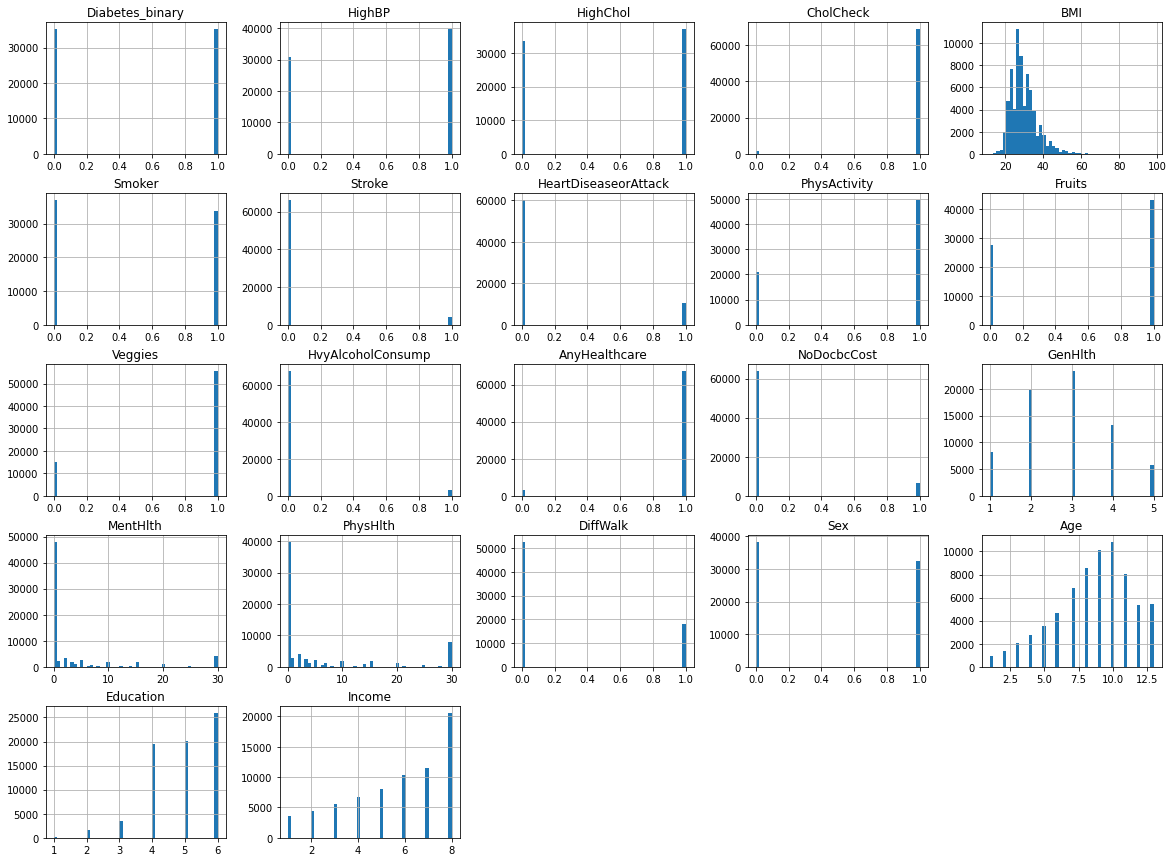

In [7]:
_ = df3.hist(bins=50, figsize=(20,15))
#plt.savefig(fname, dpi=1200, format=pdf)

# Step 3: Preprocessing & Creating Imbalance

We create versions/surrogates in addition to the original data by subsamspling one of the classes

The dataframe is perfectly balanced. We can undersample Class 0 or Class 1 to create a 90% imbalance in the dataset.

In [8]:
df3['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [9]:
# code below adapted from [https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets]
# class count
count_class_0, count_class_1 = df3.Diabetes_binary.value_counts()

# divide by class
df_class_0 = df3[df3['Diabetes_binary'] == 0]
df_class_1 = df3[df3['Diabetes_binary'] == 1]

df_class_0_under = df_class_0.sample(7069)
df3_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [10]:
df3_under

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
34805,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,5.0,3.0
442,0.0,1.0,1.0,1.0,27.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,1.0,9.0,6.0,8.0
29580,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
27205,0.0,1.0,0.0,1.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,11.0,6.0,7.0
16379,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


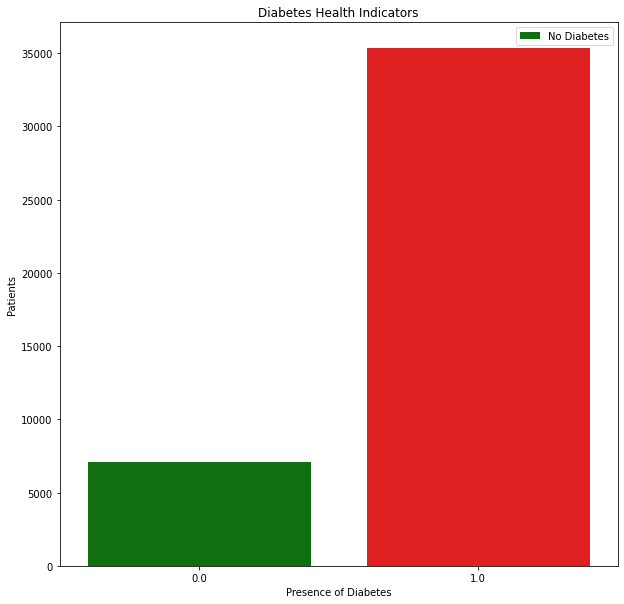

In [14]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(x = df3_under['Diabetes_binary'], palette=['Green','Red'])
plt.xlabel('Presence of Diabetes')
plt.ylabel('Patients')
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('Diabetes Health Indicators')
plt.show()